In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

In [155]:
class AntAlgorithm:
    def __init__(self, num_ants=10, max_iterations=100, evaporation_rate=0.1, alpha=1.0, beta=1.0):
        self.num_ants = num_ants
        self.max_iterations = max_iterations
        self.evaporation_rate = evaporation_rate
        self.alpha = alpha
        self.beta = beta
        self.bounds = (-100, 100)
        self.best_solution = None
        self.best_fitness = np.inf
        self.iteration = None
        self.ants = np.random.uniform(self.bounds[0], self.bounds[1], size=(self.num_ants, 2))
        self.iteration_result = []

    def ackley(self, x, y):
        term1 = -0.2 * np.sqrt(0.5 * (x**2 + y**2))
        term2 = 0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))
        return -20.0 * np.exp(term1) - np.exp(term2) + 20.0 + np.exp(1)

    def __calculate_probabilities(self, x, y, pheromones):
        probabilities = np.zeros_like(self.search_space)
        for j, value in enumerate(self.search_space):
            dx = abs(value - x)
            dy = abs(value - y)
            probabilities[j] = pheromones * (1.0 / (dx**self.alpha + dy**self.beta)) if dx > 0 and dy > 0 else 0.0

        probabilities = np.nan_to_num(probabilities)
        probabilities /= np.sum(probabilities)
        return probabilities

    def aco(self):
        for iteration in range(self.max_iterations):
            fitness_values = np.zeros(self.num_ants)

            # Avaliação do fitness das soluções
            for i in range(self.num_ants):
                x, y = self.ants[i]
                fitness_values[i] = self.ackley(x, y)

                if fitness_values[i] < self.best_fitness:
                    self.best_solution = self.ants[i]
                    self.best_fitness = fitness_values[i]
                    self.iteration = iteration

            pheromones = np.ones(self.num_ants) / fitness_values

            # Atualização das posições das formigas
            for i in range(self.num_ants):
                x, y = self.ants[i]
                probabilities = self.__calculate_probabilities(x, y, pheromones[i])
                next_x = np.random.choice(self.search_space, p=probabilities)
                next_y = np.random.choice(self.search_space, p=probabilities)
                self.ants[i] = next_x, next_y

            pheromones *= self.evaporation_rate

            # Armazenar os resultados e estados da iteração
            self.iteration_result.append((self.ants.copy(), fitness_values.copy(), self.best_solution.copy(), self.best_fitness))

    def get_best_solution(self):
        return self.best_solution
    
    def get_best_fitness(self):
        return self.best_fitness

    def get_iteration(self):
        return self.iteration
    
    def run_aco(self):
        self.search_space = np.linspace(self.bounds[0], self.bounds[1], 100)
        self.aco()
        #self.generate_animation()

    def __frame(self, frame, fig, ax):
        ax.clear()
        ants, fitness_values, best_solution, best_fitness = self.iteration_result[frame]
        X, Y = np.meshgrid(self.search_space, self.search_space)
        Z = self.ackley(X, Y)
        ax.scatter(ants[:, 0], ants[:, 1], c='b', marker='o', label='Ants')
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.3)
        ax.scatter(best_solution[0], best_solution[1], best_fitness, c='r', marker='o', label='Best Solution')
        ax.set_title(f'Iteration: {frame+1}\nBest Fitness: {best_fitness:.4f}')

    def plot_best_solution(self):
        X, Y = np.meshgrid(self.search_space, self.search_space)
        Z = self.ackley(X, Y)

        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.3)

        x_best, y_best = self.best_solution
        z_best = self.best_fitness

        # Plotar a melhor solução
        ax.scatter(x_best, y_best, z_best, c='r', marker='o', s=100, label='Best Solution')
        ax.text(x_best, y_best, z_best, f'({x_best:.2f}, {y_best:.2f}, {z_best:.2f})', color='black', fontsize=10)

        ax.set_title('Best Solution')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Fitness')

        ax.autoscale(enable=True, tight=True)
        ax.view_init(elev=30, azim=-45)

        plt.legend()
        plt.show()

    def generate_animation(self):
        """
        Gera e exibe a animação com os resultados do algoritmo.
        """
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')

        ani = FuncAnimation(fig, self.__frame, frames=self.max_iterations, fargs=(fig, ax), interval=200)
        video = ani.to_html5_video()

        filename = "aco_akley.html"
        with open(f'./export/{filename}', "w") as file:
            file.write(video)

        #html_animation = HTML(ani.to_jshtml())
        plt.close()  # Fecha a figura para evitar a exibição duplicada no VS Code
        #plt.savefig('./export/html_animation.html')
        #display(html_animation)

In [156]:
algorithm = AntAlgorithm(num_ants=10, max_iterations=10, evaporation_rate=0.1, alpha=2.0, beta=1.0)
algorithm.run_aco()
print("Best Solution:", algorithm.get_best_solution())
print("Best Fitness:", algorithm.get_best_fitness())
print("Iteration:", algorithm.get_iteration() + 1)

Best Solution: [ 7.07070707 -3.03030303]
Best Fitness: 3.663898852402959
Iteration: 5


In [154]:
result1 = algorithm.ackley(-45.45454545, -77.77777778)
print("Resultado 1:", result1)

Resultado 1: 22.04314206354958


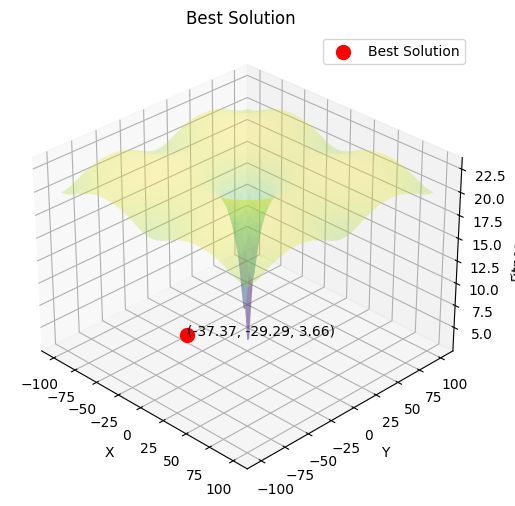

In [145]:
algorithm.plot_best_solution()

In [141]:
algorithm.generate_animation()

In [119]:
algorithm.ackley(7.07070707, 3.03030303)

13.413693811507743

In [42]:
tests = pd.DataFrame(columns=['num_ants', 'max_iterations', 'evaporation_rate', 'alpha', 'beta', 'best_fitness', 'best_solution', 'iteration'])

tests.loc[0] = [5, 100, 0.5, 1.0, 1.0, np.NaN, np.NaN, 0]
tests.loc[1] = [10, 100, 0.5, 2.0, 1.0, np.NaN, np.NaN, 0]
tests.loc[2] = [25, 100, 0.5, 3.0, 2.0, np.NaN, np.NaN, 0]
tests.loc[3] = [50, 100, 0.5, 3.0, 1.0, np.NaN, np.NaN, 0]
tests.loc[4] = [5, 1000, 0.5, 4.0, 1.5, np.NaN, np.NaN, 0]
tests.loc[5] = [10, 1000, 1.0, 1.0, 1.0, np.NaN, np.NaN, 0]
tests.loc[6] = [25, 1000, 0.25, 1.0, 1.0, np.NaN, np.NaN, 0]
tests.loc[7] = [50, 1000, 2.0, 2.0, 3.0, np.NaN, np.NaN, 0]

tests = tests.astype({"num_ants": int, "max_iterations": int, "iteration": int})
tests

,num_ants,max_iterations,evaporation_rate,alpha,beta,best_fitness,best_solution,iteration
0,5,100,0.50,1.0,1.0,NaN,NaN,0
1,10,100,0.50,2.0,1.0,NaN,NaN,0
2,25,100,0.50,3.0,2.0,NaN,NaN,0
3,50,100,0.50,3.0,1.0,NaN,NaN,0
4,5,1000,0.50,4.0,1.5,NaN,NaN,0
5,10,1000,1.00,1.0,1.0,NaN,NaN,0
6,25,1000,0.25,1.0,1.0,NaN,NaN,0
7,50,1000,2.00,2.0,3.0,NaN,NaN,0


In [43]:
for index in range(len(tests)):
    ants = tests.loc[index, 'num_ants']
    iterations = tests.loc[index, 'max_iterations']
    evaporation= tests.loc[index, 'evaporation_rate']
    alpha = tests.loc[index, 'alpha']
    beta = tests.loc[index, 'beta']
    algorithm = AntAlgorithm(
        num_ants=ants,
        max_iterations=iterations,
        evaporation_rate=evaporation,
        alpha=alpha,
        beta=beta
    )
    algorithm.run_aco()
    tests.loc[index, 'best_fitness'] = algorithm.get_best_fitness()
    #tests.loc[index, 'best_solution'] = algorithm.get_best_solution().tolist()
    tests.loc[index, 'iteration'] = algorithm.get_iteration() + 1

tests

,num_ants,max_iterations,evaporation_rate,alpha,beta,best_fitness,best_solution,iteration
0,5,100,0.50,1.0,1.0,7.296653,NaN,34
1,10,100,0.50,2.0,1.0,3.663899,NaN,23
2,25,100,0.50,3.0,2.0,3.663899,NaN,10
3,50,100,0.50,3.0,1.0,3.663899,NaN,6
4,5,1000,0.50,4.0,1.5,3.663899,NaN,6
5,10,1000,1.00,1.0,1.0,3.663899,NaN,205
6,25,1000,0.25,1.0,1.0,3.663899,NaN,2
7,50,1000,2.00,2.0,3.0,3.663899,NaN,4


In [46]:
algorithm = AntAlgorithm(num_ants=10, max_iterations=100, evaporation_rate=0.1, alpha=1.0, beta=1.0)
algorithm.run_aco()
print("Best Solution:", algorithm.get_best_solution())
print("Best Fitness:", algorithm.get_best_fitness())
print("Iteration:", algorithm.get_iteration() + 1)

Best Solution: [-33.33333333  -9.09090909]
Best Fitness: 7.296652572628199
Iteration: 77


In [ ]:
algorithm.generate_animation()

In [ ]:
algorithm = AntAlgorithm(num_ants=10, max_iterations=100, evaporation_rate=0.1, alpha=1.0, beta=1.0)
algorithm.run_animation()
print("Best Solution:", algorithm.get_best_solution())
print("Best Fitness:", algorithm.get_best_fitness())

In [ ]:
algorithm = AntAlgorithm(num_ants=50, max_iterations=100, evaporation_rate=0.1, alpha=1.0, beta=1.0)
algorithm.run_animation()
best_solution = algorithm.get_best_solution()
print("Best Solution:", best_solution)